In [1]:
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torchvision import transforms

In [2]:
G = torch.load('../models/g_mnist.model')

c:\users\user\documents\git\dl4cv-git\.venv\lib\site-packages\torch\serialization.py:286: SourceChangeWarning: source code of class 'mnist_dcgan_generator.Generator' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [3]:
count = 5
classes = 10

onehot = torch.zeros(10, 10)
onehot = onehot.scatter_(1, torch.LongTensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).view(10, 1), 1).view(10, 10, 1, 1)

noise = torch.randn((10 * 10, 100)).view(-1, 100, 1, 1)    # fixed noise
noise = Variable(noise.cuda(), volatile=True)
labels = torch.LongTensor(10*10).random_(0, 10)
labels = torch.LongTensor([x//10 for x in list(range(100))])
label = Variable(onehot[labels].cuda())

images = G(noise, label)

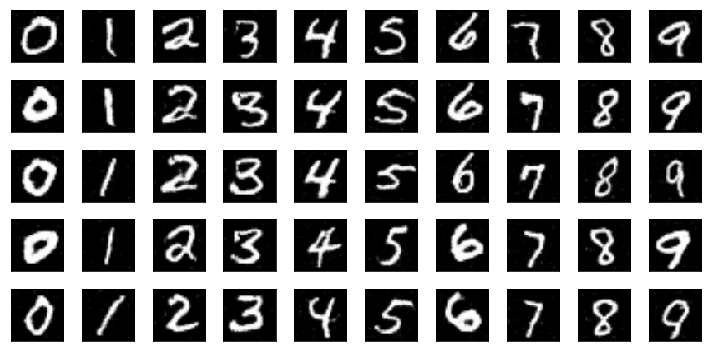

In [4]:
fig, ax = plt.subplots(count, classes, figsize=(classes,count))
for k in range(classes*count):
    i = k // count
    j = k % count
    i, j = j, i
    ax[i, j].cla()
    if is_rgb:
        img = images[k].cpu().data  # .normal_() (dont do this. You just get noise.)
        img = to_img(normalize(img))
        ax[i, j].imshow(img)
    else:
        ax[i, j].imshow(images[k, 0].cpu().data.numpy(), cmap='gray')
    ax[i, j].get_xaxis().set_visible(False)
    ax[i, j].get_yaxis().set_visible(False)
    ax[i, j].title.set_text("")#(labels[k])
plt.tight_layout()
plt.show()